In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys

In [3]:
f = pd.read_csv('kanjanaphisek_bangkok_pm25.csv')
f
f.rename(columns={'UTC Hour':'Hour'}, inplace=True)
f.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [5]:
f['datetime'] = pd.to_datetime(f[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
f.index = f['datetime']
f.Hour = f.index.hour # UTC hour to UTC+7
f.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,47.9,1,0,2016-03-03 19:00:00


(23814, 5)

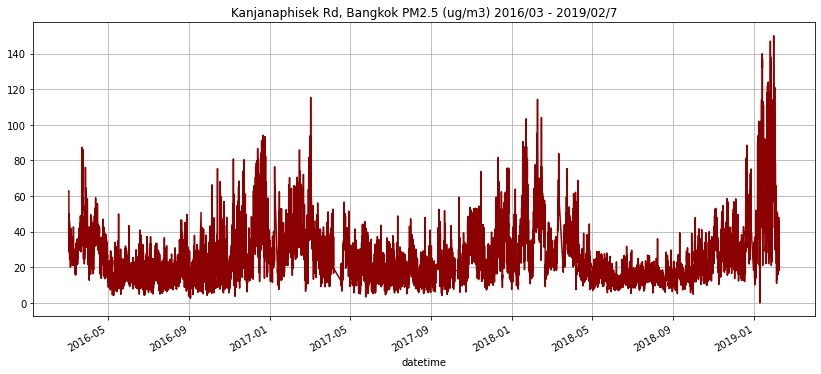

In [6]:
f.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
f['PM2.5'].plot(figsize=(14,6),title="Kanjanaphisek Rd, Bangkok PM2.5 (ug/m3) 2016/03 - 2019/02/7", color='darkred', grid=True)
f.shape

<AxesSubplot:title={'center':'Bangkok PM2.5 Daily Maximum Yearly comparison (ug/m3)'}, xlabel='datetime'>

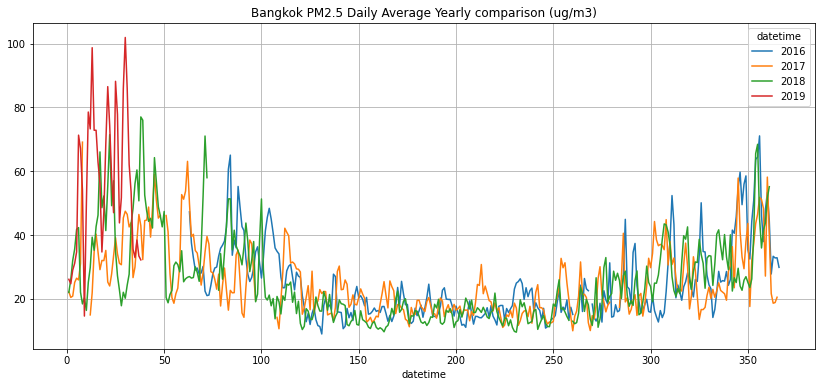

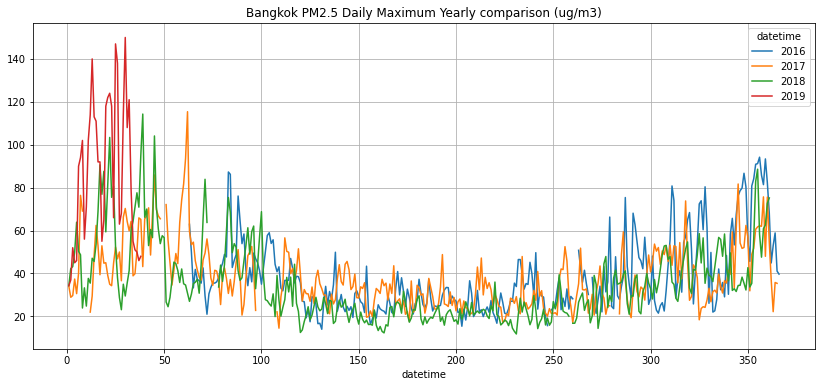

In [10]:
pv = pd.pivot_table(f, index=f.index.dayofyear, columns=f.index.year,
                    values='PM2.5', aggfunc='mean')
pv.plot(title="Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(f, index=f.index.dayofyear, columns=f.index.year,
                    values='PM2.5', aggfunc='max')
pv2.plot(title="Bangkok PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
features

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

In [13]:
features[2]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

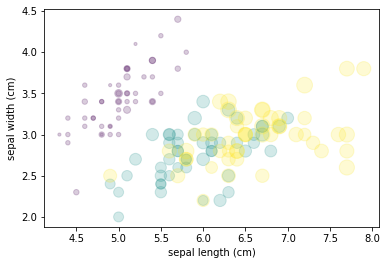

In [14]:
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [15]:
f1 = f.copy()

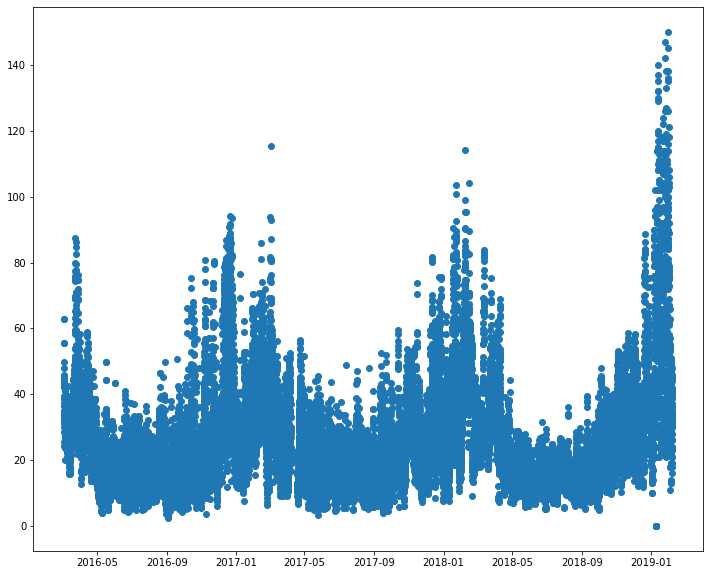

In [16]:
f['PM2.5'].describe()
# 0- 50
# 50-100
# 100-150
plt.subplots(figsize=(12,10))
plt.scatter(f.index, f['PM2.5'])
plt.show()

In [17]:
pd.cut(f1['PM2.5'], 3)

datetime
2016-03-03 15:00:00    (50.0, 100.0]
2016-03-03 16:00:00    (50.0, 100.0]
2016-03-03 17:00:00    (50.0, 100.0]
2016-03-03 18:00:00    (50.0, 100.0]
2016-03-03 19:00:00    (-0.15, 50.0]
                           ...      
2019-02-07 11:00:00    (-0.15, 50.0]
2019-02-07 12:00:00    (-0.15, 50.0]
2019-02-07 13:00:00    (-0.15, 50.0]
2019-02-07 14:00:00    (-0.15, 50.0]
2019-02-07 15:00:00    (-0.15, 50.0]
Name: PM2.5, Length: 23814, dtype: category
Categories (3, interval[float64]): [(-0.15, 50.0] < (50.0, 100.0] < (100.0, 150.0]]

In [19]:
label = ['Below 50', 'Btw 50-100', 'Btw 100-150']
f1['Group'] = pd.cut(f1['PM2.5'], 3, labels = label)
f

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9
2016-03-03 16:00:00,2016,3,3,16,62.9
2016-03-03 17:00:00,2016,3,3,17,55.5
2016-03-03 18:00:00,2016,3,3,18,55.5
2016-03-03 19:00:00,2016,3,3,19,47.9
...,...,...,...,...,...
2019-02-07 11:00:00,2019,2,7,11,42.0
2019-02-07 12:00:00,2019,2,7,12,33.0
2019-02-07 13:00:00,2019,2,7,13,37.0


In [20]:
#f1.drop(columns=['PM2.5(Group)'], inplace = True)
pm = f1['PM2.5'].values
GROUP = f1['Group'].values
GROUP_ = np.unique(GROUP)

time = f.index
time

DatetimeIndex(['2016-03-03 15:00:00', '2016-03-03 16:00:00',
               '2016-03-03 17:00:00', '2016-03-03 18:00:00',
               '2016-03-03 19:00:00', '2016-03-03 20:00:00',
               '2016-03-03 21:00:00', '2016-03-03 22:00:00',
               '2016-03-03 23:00:00', '2016-03-04 00:00:00',
               ...
               '2019-02-07 06:00:00', '2019-02-07 07:00:00',
               '2019-02-07 08:00:00', '2019-02-07 09:00:00',
               '2019-02-07 10:00:00', '2019-02-07 11:00:00',
               '2019-02-07 12:00:00', '2019-02-07 13:00:00',
               '2019-02-07 14:00:00', '2019-02-07 15:00:00'],
              dtype='datetime64[ns]', name='datetime', length=23814, freq=None)

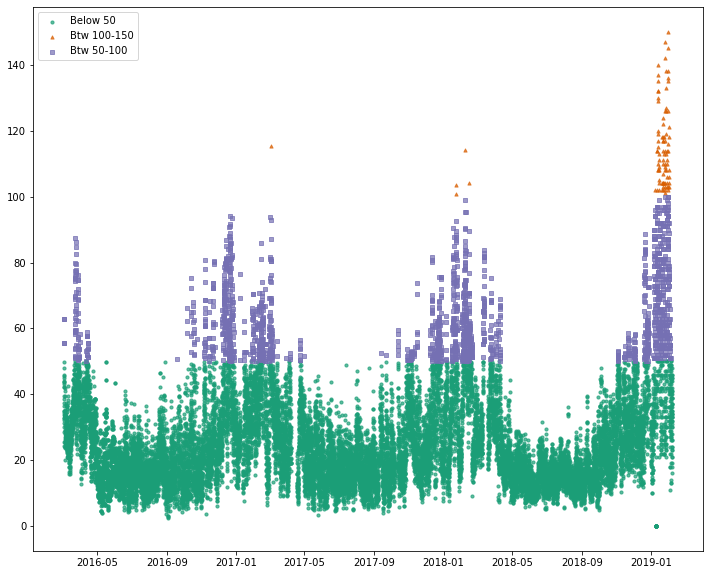

In [21]:
MARKERS = ["o", "^", "s"] # circle, triangle, square
COLORS = ["#1B9E77", "#D95F02", "#7570B3"]

fig, ax = plt.subplots(figsize=(12,10))

for group, color, marker in zip(GROUP_, COLORS, MARKERS):
    idxs = np.where(GROUP == group)
    ax.scatter(
        time[idxs], pm[idxs], label=group,
        s=10, color=color, marker=marker, alpha=0.7
    )
    
ax.legend();

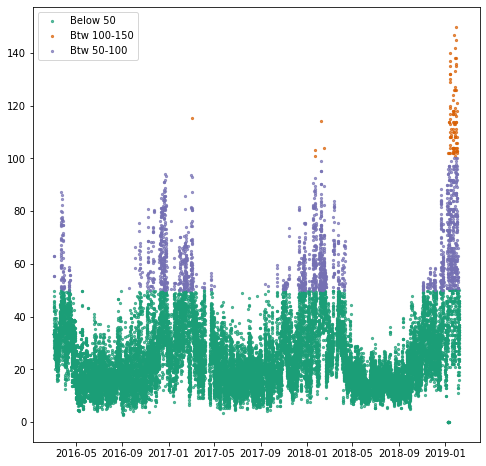

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
for group, color in zip(GROUP_, COLORS):
    idxs = np.where(GROUP == group)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        time[idxs], pm[idxs], label=group,
        s=5, color=color, alpha=0.7
    )
    
ax.legend();

In [23]:
f1 = f[f['PM2.5'] <= 50]
f1.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 19:00:00,2016,3,3,19,47.9
2016-03-03 20:00:00,2016,3,3,20,43.6
2016-03-03 21:00:00,2016,3,3,21,28.6
2016-03-03 22:00:00,2016,3,3,22,33.6
2016-03-03 23:00:00,2016,3,3,23,34.8


In [25]:
low = 50
high = 100
mask = (f['PM2.5'] > low) & (f['PM2.5'] < high)

f2 = f[mask]
f2.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9
2016-03-03 16:00:00,2016,3,3,16,62.9
2016-03-03 17:00:00,2016,3,3,17,55.5
2016-03-03 18:00:00,2016,3,3,18,55.5
2016-03-23 04:00:00,2016,3,22,4,54.2


In [26]:
low = 100
high = 150
mask1 = (f['PM2.5'] > low) & (f['PM2.5'] < high)

f3 = f[mask1]
f3.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2017-03-03 09:00:00,2017,3,3,9,115.4
2018-01-22 08:00:00,2018,1,22,8,103.4
2018-01-22 09:00:00,2018,1,22,9,100.8
2018-02-08 10:00:00,2018,2,8,10,114.3
2018-02-14 08:00:00,2018,2,14,8,104.1


In [28]:
#Pie chart
l = ['Low','Medium','High']
pie = pd.cut(f1['PM2.5'],3, labels = l).value_counts()
pie

Medium    10817
Low        7362
High       3827
Name: PM2.5, dtype: int64

Text(0.5, 1.0, 'Level of PM2.5')

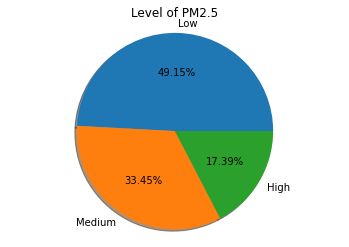

In [31]:
explode = (0.1,0.3,0.5)
fig, ax = plt.subplots()
ax.pie( pie, labels=l, shadow=True, autopct='%1.2f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Level of PM2.5')

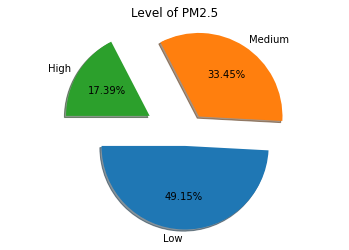

In [34]:
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.1, 0.3, 0.5)

fig, ax = plt.subplots()
ax.pie(pie,
       explode=explode,
       labels=l,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Level of PM2.5')

plt.show()